In [1]:
import pandas as pd
import numpy as np
import warnings

pd.set_option("mode.copy_on_write", True)

In [ ]:
wa_data=pd.read_csv("final_dataset.csv")
wa_data=wa_data[wa_data["State"]=="WA"]
wa_data=wa_data[["County_FIPS_x","pop_Year","mort_overdose_deaths","opioid_YEAR","opioid_morphine_equivalent_g","pop_Population"]]
unique_population_by_county = wa_data.groupby("County_FIPS_x")["pop_Population"].first()
wa_total_population = unique_population_by_county.sum()


wa_mort = wa_data.groupby(['opioid_YEAR'])['mort_overdose_deaths'].sum()
wa_mort = wa_mort.reset_index()
wa_mort["wa_total_population"]=wa_total_population
wa_mort["mort_pop"] = wa_mort["mort_overdose_deaths"] / wa_mort["wa_total_population"]
wa_mort=wa_mort[["opioid_YEAR","mort_pop"]]
wa_mort.rename(columns={'opioid_YEAR': 'Year'}, inplace=True)
 
wa_opioid = wa_data.groupby(['opioid_YEAR'])['opioid_morphine_equivalent_g'].sum()
wa_opioid = wa_opioid.reset_index()
wa_opioid["wa_total_population"]=wa_total_population
wa_opioid["opioid_pop"] = wa_opioid["opioid_morphine_equivalent_g"] / wa_opioid["wa_total_population"]
wa_opioid=wa_opioid[["opioid_YEAR","opioid_pop"]]
wa_opioid.rename(columns={'opioid_YEAR': 'Year'}, inplace=True)

,Year,mort_pop
0,2006,0.000128
1,2007,0.000137
2,2008,0.000139
3,2009,0.000135
4,2010,0.000127
5,2011,0.000143
6,2012,0.000138
7,2013,0.000137
8,2014,0.000141
9,2015,0.000154


In [49]:
import matplotlib.pyplot as plt

def create_charts_generic(x1, y1, label1, title1):
    """
    Creates a single plot for the given data and labels.

    Parameters:
    - x1: Data for the x-axis (e.g., years).
    - y1: Data for the y-axis (e.g., values to plot).
    - label1: Label for the y-axis and legend.
    - title1: Title for the chart.
    """
    # Define Duke color palette
    duke_colors = {
        'blue': '#00539B',    # Duke Blue
        'gray': '#666666',    # Graphite
        'background': '#F3F2F1',  # Whisper Gray
    }
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6), facecolor=duke_colors['background'])
    fig.suptitle('Data Visualization', fontsize=18, weight='bold', color=duke_colors['blue'])
    
    ax.plot(
        x1, 
        y1, 
        marker='o', 
        color=duke_colors['blue'], 
        label=label1,
        linewidth=2
    )
    ax.set_title(title1, fontsize=16, weight='bold', color=duke_colors['blue'])
    ax.set_xlabel('Year', fontsize=14, weight='bold', color=duke_colors['gray'])
    ax.set_ylabel(label1, fontsize=14, weight='bold', color=duke_colors['gray'])
    ax.grid(color=duke_colors['gray'], linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend(fontsize=12, loc='upper left', frameon=True, edgecolor=duke_colors['gray'])
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

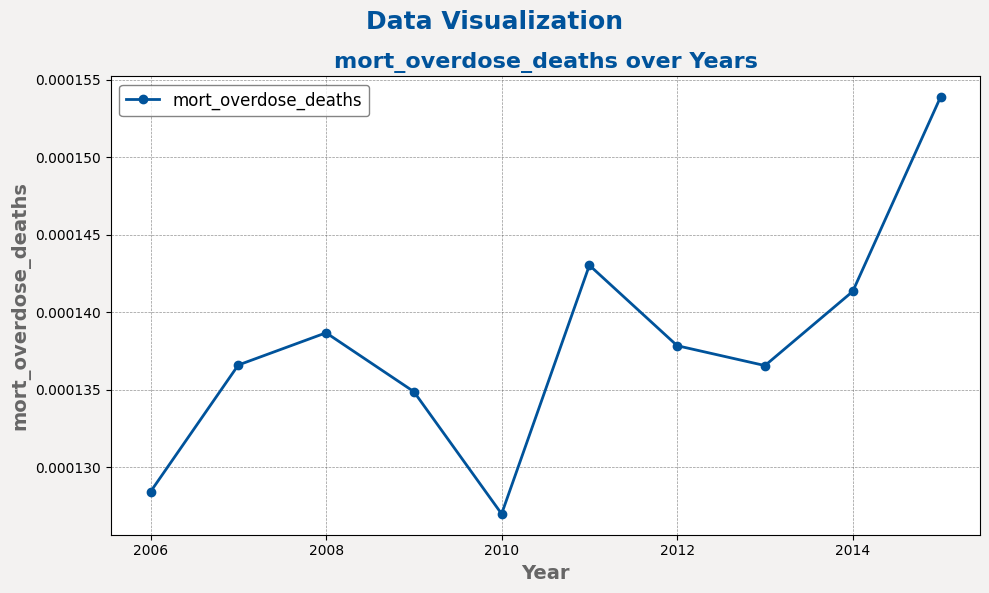

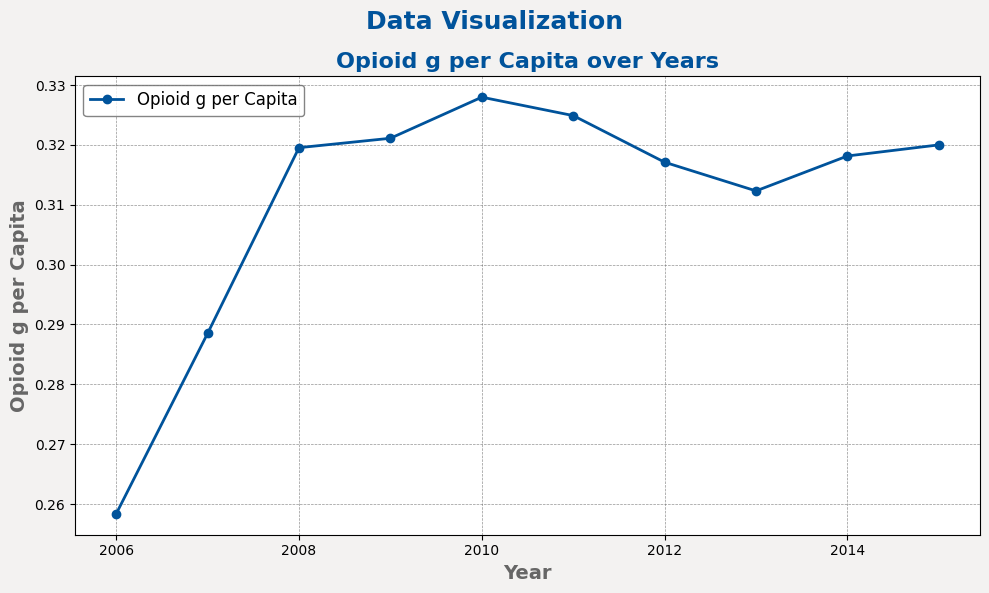

In [52]:
create_charts_generic(
    x1=wa_mort['Year'], 
    y1=wa_mort['mort_pop'], 
    label1='mort_overdose_deaths',
    title1='mort_overdose_deaths over Years'
)

create_charts_generic(
    x1=wa_opioid['Year'], 
    y1=wa_opioid['opioid_pop'], 
    label1='Opioid g per Capita',
    title1='Opioid g per Capita over Years'
)


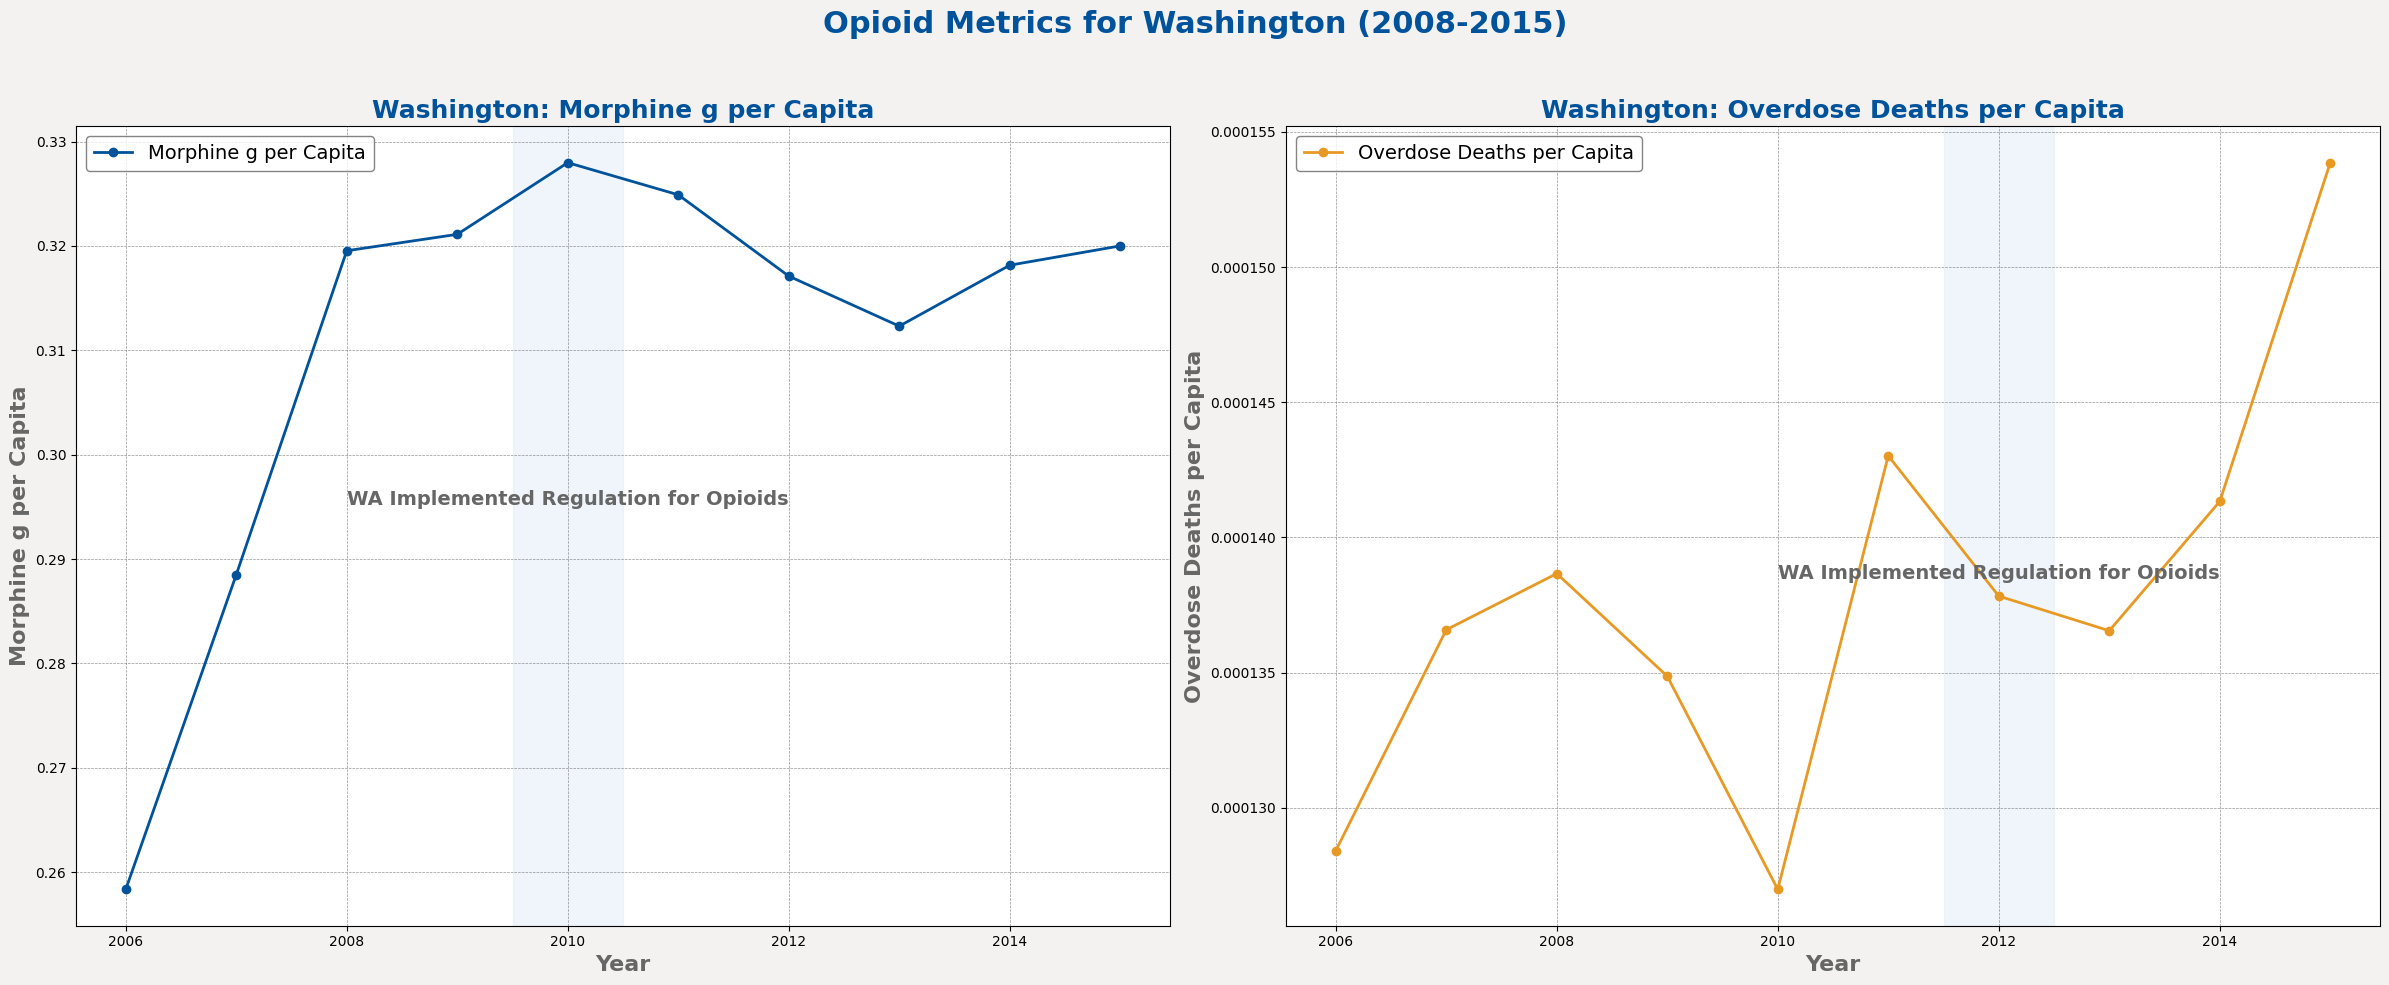

In [57]:
import matplotlib.pyplot as plt

def create_charts_wa_wide(final_dataset):
    # Filter data for WA only
    wa_data = final_dataset[final_dataset['State'] == 'WA']
    
    # Ensure 'opioid_YEAR' is numeric and drop invalid rows
    wa_data['opioid_YEAR'] = pd.to_numeric(wa_data['opioid_YEAR'], errors='coerce')
    wa_data = wa_data.dropna(subset=['opioid_YEAR'])
    
    # Filter for years between 2008 and 2015
    wa_data = wa_data[(wa_data['opioid_YEAR'] >= 2006) & (wa_data['opioid_YEAR'] <= 2015)]
    
    # Group by year and aggregate the required metrics
    aggregated_data = wa_data.groupby('opioid_YEAR').agg(
        total_population=('pop_Population', 'sum'),
        total_morphine=('opioid_morphine_equivalent_g', 'sum'),
        total_deaths=('mort_overdose_deaths', 'sum')
    ).reset_index()
    
    # Compute per capita metrics
    aggregated_data['morphine_per_capita'] = aggregated_data['total_morphine'] / aggregated_data['total_population']
    aggregated_data['deaths_per_capita'] = aggregated_data['total_deaths'] / aggregated_data['total_population']
    
    # Define Duke color palette
    duke_colors = {
        'blue': '#00539B',    # Duke Blue
        'gray': '#666666',    # Graphite
        'orange': '#E89923',  # Persimmon
        'green': '#339898',   # Eno
        'background': '#F3F2F1',  # Whisper Gray
        'highlight': '#D9E8F6'  # Light Blue for shaded area
    }
    
    # Create side-by-side subplots with increased figure size
    fig, axes = plt.subplots(1, 2, figsize=(24, 10), facecolor=duke_colors['background'])
    fig.suptitle('Opioid Metrics for Washington (2008-2015)', fontsize=22, weight='bold', color=duke_colors['blue'])
    
    # Chart 1: Morphine per capita
    axes[0].plot(
        aggregated_data['opioid_YEAR'], 
        aggregated_data['morphine_per_capita'], 
        marker='o', 
        color=duke_colors['blue'], 
        label='Morphine g per Capita',
        linewidth=2
    )
    axes[0].axvspan(2009.5, 2010.5, color=duke_colors['highlight'], alpha=0.4)
    axes[0].text(2010, max(aggregated_data['morphine_per_capita']) * 0.9, 
                 'WA Implemented Regulation for Opioids',
                 horizontalalignment='center',
                 fontsize=14, color=duke_colors['gray'], weight='bold')
    axes[0].set_title('Washington: Morphine g per Capita', fontsize=18, weight='bold', color=duke_colors['blue'])
    axes[0].set_xlabel('Year', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[0].set_ylabel('Morphine g per Capita', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[0].grid(color=duke_colors['gray'], linestyle='--', linewidth=0.5, alpha=0.7)
    axes[0].legend(fontsize=14, loc='upper left', frameon=True, edgecolor=duke_colors['gray'])
    
    # Chart 2: Overdose deaths per capita
    axes[1].plot(
        aggregated_data['opioid_YEAR'], 
        aggregated_data['deaths_per_capita'], 
        marker='o', 
        color=duke_colors['orange'], 
        label='Overdose Deaths per Capita',
        linewidth=2
    )
    axes[1].axvspan(2011.5, 2012.5, color=duke_colors['highlight'], alpha=0.4)
    axes[1].text(2012, max(aggregated_data['deaths_per_capita']) * 0.9, 
                 'WA Implemented Regulation for Opioids',
                 horizontalalignment='center',
                 fontsize=14, color=duke_colors['gray'], weight='bold')
    axes[1].set_title('Washington: Overdose Deaths per Capita', fontsize=18, weight='bold', color=duke_colors['blue'])
    axes[1].set_xlabel('Year', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[1].set_ylabel('Overdose Deaths per Capita', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[1].grid(color=duke_colors['gray'], linestyle='--', linewidth=0.5, alpha=0.7)
    axes[1].legend(fontsize=14, loc='upper left', frameon=True, edgecolor=duke_colors['gray'])
    
    # Adjust layout to minimize overlap
    plt.subplots_adjust(wspace=0.4, hspace=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call the function
final_dataset = pd.read_csv("final_dataset.csv")
create_charts_wa_wide(final_dataset=final_dataset)


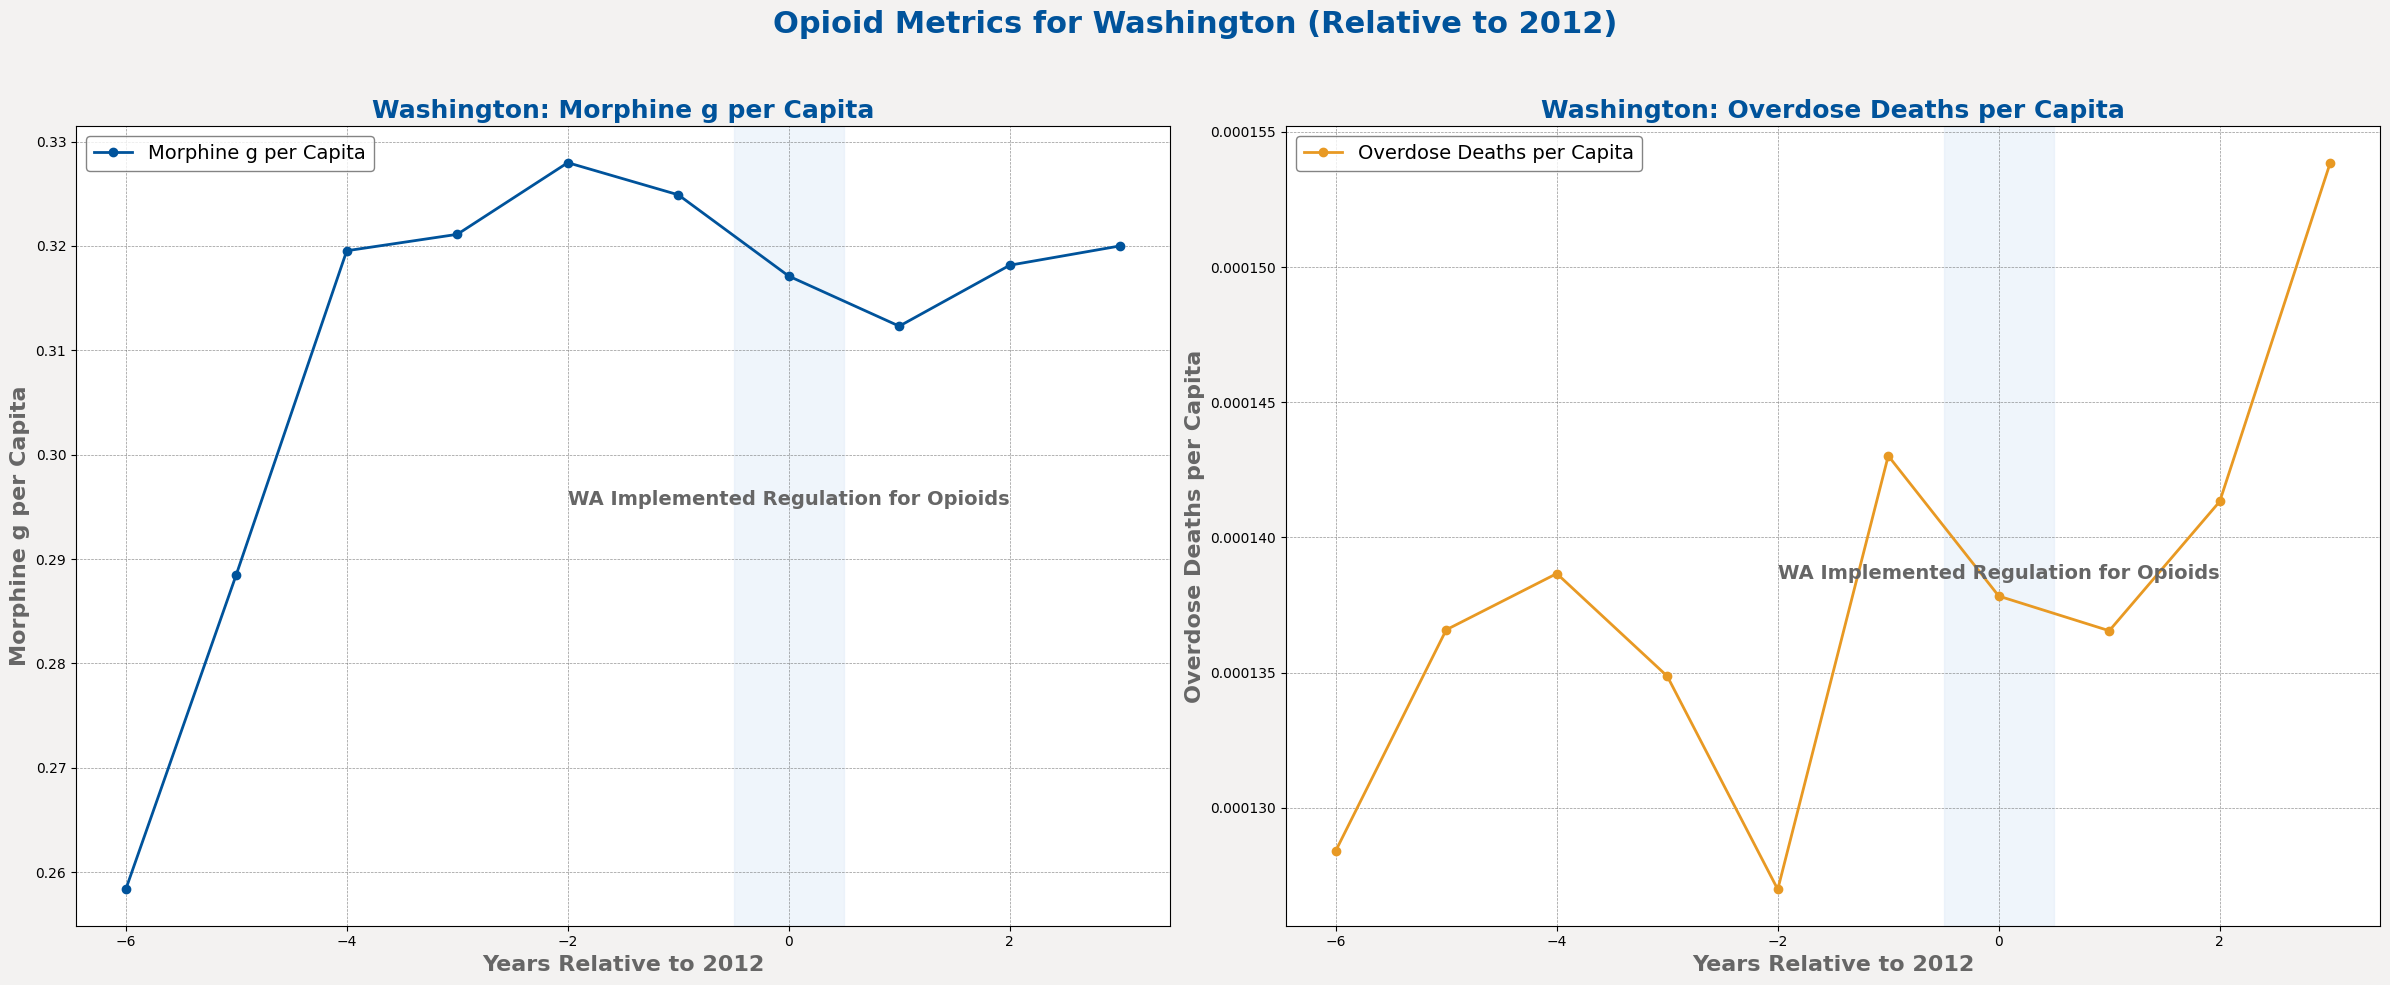

In [63]:
import matplotlib.pyplot as plt

def create_charts_wa_relative(final_dataset):
    # Filter data for WA only
    wa_data = final_dataset[final_dataset['State'] == 'WA']
    
    # Ensure 'opioid_YEAR' is numeric and drop invalid rows
    wa_data['opioid_YEAR'] = pd.to_numeric(wa_data['opioid_YEAR'], errors='coerce')
    wa_data = wa_data.dropna(subset=['opioid_YEAR'])
    
    # Filter for years between 2006 and 2015
    wa_data = wa_data[(wa_data['opioid_YEAR'] >= 2006) & (wa_data['opioid_YEAR'] <= 2015)]
    
    # Adjust the x-axis to use 2012 as the 0 point
    wa_data['relative_year'] = wa_data['opioid_YEAR'] - 2012
    
    # Group by relative year and aggregate the required metrics
    aggregated_data = wa_data.groupby('relative_year').agg(
        total_population=('pop_Population', 'sum'),
        total_morphine=('opioid_morphine_equivalent_g', 'sum'),
        total_deaths=('mort_overdose_deaths', 'sum')
    ).reset_index()
    
    # Compute per capita metrics
    aggregated_data['morphine_per_capita'] = aggregated_data['total_morphine'] / aggregated_data['total_population']
    aggregated_data['deaths_per_capita'] = aggregated_data['total_deaths'] / aggregated_data['total_population']
    
    # Define Duke color palette
    duke_colors = {
        'blue': '#00539B',    # Duke Blue
        'gray': '#666666',    # Graphite
        'orange': '#E89923',  # Persimmon
        'green': '#339898',   # Eno
        'background': '#F3F2F1',  # Whisper Gray
        'highlight': '#D9E8F6'  # Light Blue for shaded area
    }
    
    # Create side-by-side subplots with increased figure size
    fig, axes = plt.subplots(1, 2, figsize=(24, 10), facecolor=duke_colors['background'])
    fig.suptitle('Opioid Metrics for Washington (Relative to 2012)', fontsize=22, weight='bold', color=duke_colors['blue'])
    
    # Chart 1: Morphine per capita
    axes[0].plot(
        aggregated_data['relative_year'], 
        aggregated_data['morphine_per_capita'], 
        marker='o', 
        color=duke_colors['blue'], 
        label='Morphine g per Capita',
        linewidth=2
    )
    axes[0].axvspan(-0.5, 0.5, color=duke_colors['highlight'], alpha=0.4)
    axes[0].text(0, max(aggregated_data['morphine_per_capita']) * 0.9, 
                 'WA Implemented Regulation for Opioids',
                 horizontalalignment='center',
                 fontsize=14, color=duke_colors['gray'], weight='bold')
    axes[0].set_title('Washington: Morphine g per Capita', fontsize=18, weight='bold', color=duke_colors['blue'])
    axes[0].set_xlabel('Years Relative to 2012', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[0].set_ylabel('Morphine g per Capita', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[0].grid(color=duke_colors['gray'], linestyle='--', linewidth=0.5, alpha=0.7)
    axes[0].legend(fontsize=14, loc='upper left', frameon=True, edgecolor=duke_colors['gray'])
    
    # Chart 2: Overdose deaths per capita
    axes[1].plot(
        aggregated_data['relative_year'], 
        aggregated_data['deaths_per_capita'], 
        marker='o', 
        color=duke_colors['orange'], 
        label='Overdose Deaths per Capita',
        linewidth=2
    )
    axes[1].axvspan(-0.5, 0.5, color=duke_colors['highlight'], alpha=0.4)
    axes[1].text(0, max(aggregated_data['deaths_per_capita']) * 0.9, 
                 'WA Implemented Regulation for Opioids',
                 horizontalalignment='center',
                 fontsize=14, color=duke_colors['gray'], weight='bold')
    axes[1].set_title('Washington: Overdose Deaths per Capita', fontsize=18, weight='bold', color=duke_colors['blue'])
    axes[1].set_xlabel('Years Relative to 2012', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[1].set_ylabel('Overdose Deaths per Capita', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[1].grid(color=duke_colors['gray'], linestyle='--', linewidth=0.5, alpha=0.7)
    axes[1].legend(fontsize=14, loc='upper left', frameon=True, edgecolor=duke_colors['gray'])
    
    # Adjust layout to minimize overlap
    plt.subplots_adjust(wspace=0.4, hspace=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call the function
final_dataset = pd.read_csv("final_dataset.csv")
create_charts_wa_relative(final_dataset=final_dataset)


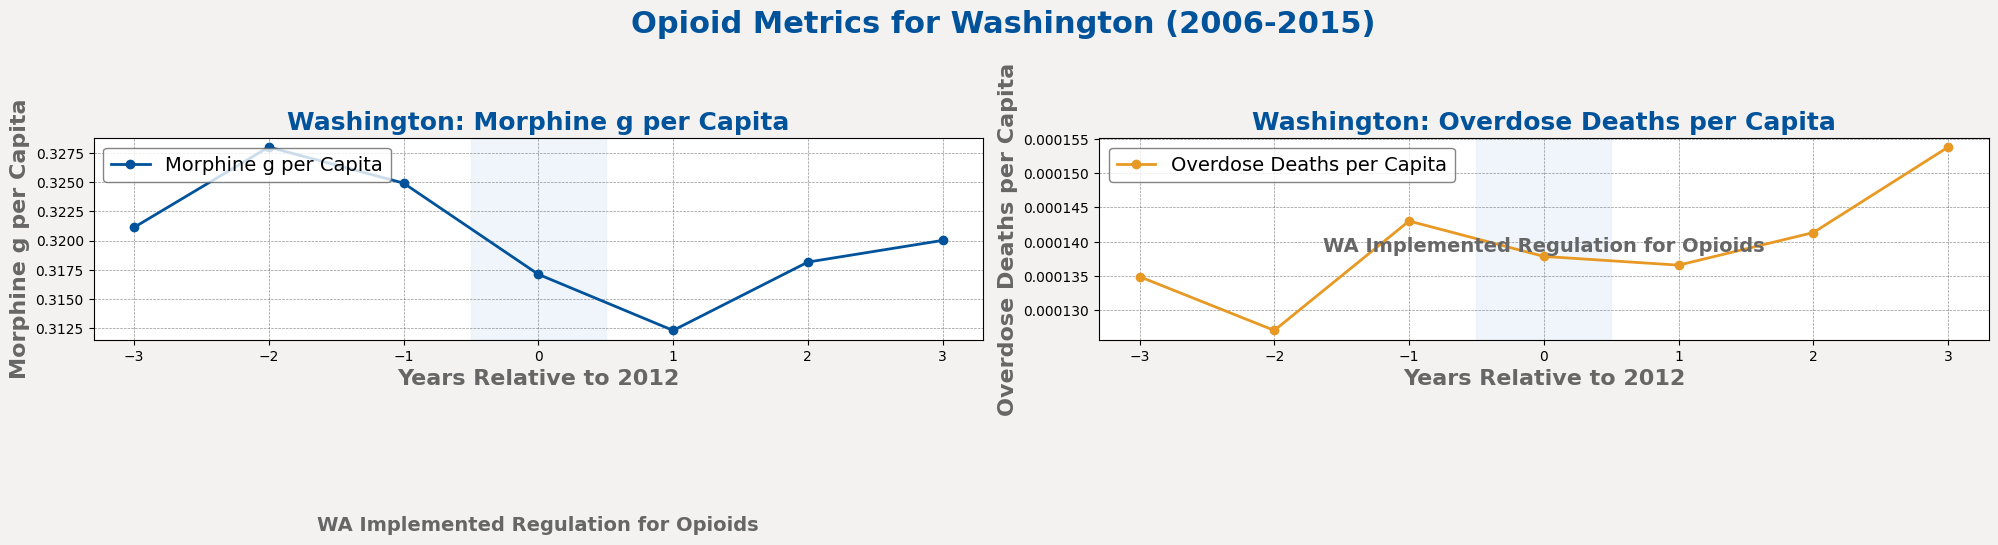

In [75]:
import matplotlib.pyplot as plt

def create_charts_wa_stretched(final_dataset):
    # Filter data for WA only
    wa_data = final_dataset[final_dataset['State'] == 'WA']
    
    # Ensure 'opioid_YEAR' is numeric and drop invalid rows
    wa_data['opioid_YEAR'] = pd.to_numeric(wa_data['opioid_YEAR'], errors='coerce')
    wa_data = wa_data.dropna(subset=['opioid_YEAR'])
    
    # Filter for years between 2006 and 2015
    wa_data = wa_data[(wa_data['opioid_YEAR'] >= 2009) & (wa_data['opioid_YEAR'] <= 2015)]
    
    # Adjust the x-axis to use 2012 as the 0 point
    wa_data['relative_year'] = wa_data['opioid_YEAR'] - 2012
    
    # Group by relative year and aggregate the required metrics
    aggregated_data = wa_data.groupby('relative_year').agg(
        total_population=('pop_Population', 'sum'),
        total_morphine=('opioid_morphine_equivalent_g', 'sum'),
        total_deaths=('mort_overdose_deaths', 'sum')
    ).reset_index()
    
    # Compute per capita metrics
    aggregated_data['morphine_per_capita'] = aggregated_data['total_morphine'] / aggregated_data['total_population']
    aggregated_data['deaths_per_capita'] = aggregated_data['total_deaths'] / aggregated_data['total_population']
    
    # Define Duke color palette
    duke_colors = {
        'blue': '#00539B',    # Duke Blue
        'gray': '#666666',    # Graphite
        'orange': '#E89923',  # Persimmon
        'green': '#339898',   # Eno
        'background': '#F3F2F1',  # Whisper Gray
        'highlight': '#D9E8F6'  # Light Blue for shaded area
    }
    
    # Create side-by-side subplots with increased height for y-axis stretching
    fig, axes = plt.subplots(1, 2, figsize=(20, 14), facecolor=duke_colors['background'])  # Increased height
    fig.suptitle('Opioid Metrics for Washington (2006-2015)', fontsize=22, weight='bold', color=duke_colors['blue'])
    
    # Chart 1: Morphine per capita
    axes[0].plot(
        aggregated_data['relative_year'], 
        aggregated_data['morphine_per_capita'], 
        marker='o', 
        color=duke_colors['blue'], 
        label='Morphine g per Capita',
        linewidth=2
    )
    axes[0].axvspan(-0.5, 0.5, color=duke_colors['highlight'], alpha=0.4)
    axes[0].text(0, max(aggregated_data['morphine_per_capita']) * 0.9, 
                 'WA Implemented Regulation for Opioids',
                 horizontalalignment='center',
                 fontsize=14, color=duke_colors['gray'], weight='bold')
    axes[0].set_title('Washington: Morphine g per Capita', fontsize=18, weight='bold', color=duke_colors['blue'])
    axes[0].set_xlabel('Years Relative to 2012', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[0].set_ylabel('Morphine g per Capita', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[0].grid(color=duke_colors['gray'], linestyle='--', linewidth=0.5, alpha=0.7)
    axes[0].legend(fontsize=14, loc='upper left', frameon=True, edgecolor=duke_colors['gray'])
    
    # Chart 2: Overdose deaths per capita
    axes[1].plot(
        aggregated_data['relative_year'], 
        aggregated_data['deaths_per_capita'], 
        marker='o', 
        color=duke_colors['orange'], 
        label='Overdose Deaths per Capita',
        linewidth=2
    )
    axes[1].axvspan(-0.5, 0.5, color=duke_colors['highlight'], alpha=0.4)
    axes[1].text(0, max(aggregated_data['deaths_per_capita']) * 0.9, 
                 'WA Implemented Regulation for Opioids',
                 horizontalalignment='center',
                 fontsize=14, color=duke_colors['gray'], weight='bold')
    axes[1].set_title('Washington: Overdose Deaths per Capita', fontsize=18, weight='bold', color=duke_colors['blue'])
    axes[1].set_xlabel('Years Relative to 2012', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[1].set_ylabel('Overdose Deaths per Capita', fontsize=16, weight='bold', color=duke_colors['gray'])
    axes[1].grid(color=duke_colors['gray'], linestyle='--', linewidth=0.5, alpha=0.7)
    axes[1].legend(fontsize=14, loc='upper left', frameon=True, edgecolor=duke_colors['gray'])
    
    # Adjust layout to minimize overlap
    plt.subplots_adjust(wspace=0.4, hspace=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    
# Call the function
final_dataset = pd.read_csv("final_dataset.csv")
create_charts_wa_stretched(final_dataset=final_dataset)
